In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform, pdist

Creating a random dataset with 2 features, a real time dataset is not used because, in hierarchial clustering we need to create n clusters for n points in the start (divisive) or in the end  (agglomerative), so the plotting will be very difficult for large no of points. so for learning purpose ive used a random data with 10 points and 2 features

In [17]:
a = np.random.random_sample(size = 10)
b = np.random.random_sample(size = 10)

In [18]:
point = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10']
data = pd.DataFrame({'Point':point, 'a':np.round(a,2), 'b':np.round(b,2)})
data = data.set_index('Point')
data

,a,b
Point,,
P1,0.37,0.07
P2,0.77,0.75
P3,0.74,0.56
P4,0.81,0.29
P5,0.36,0.49
P6,0.07,0.24
P7,0.04,0.29
P8,0.85,0.66
P9,0.78,0.25


Plotting the points

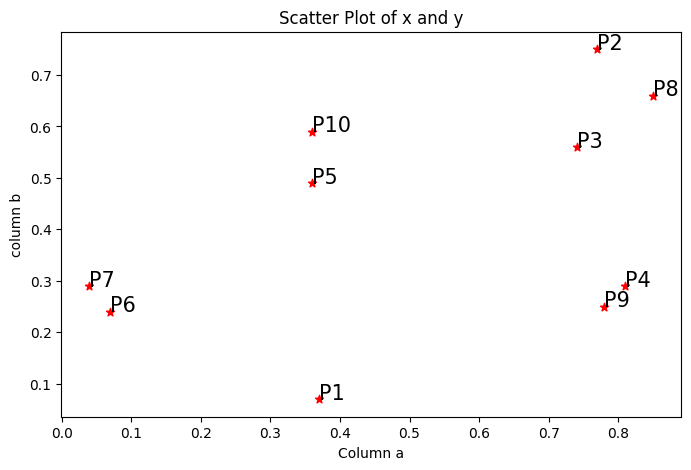

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(data['a'], data['b'], c='r', marker='*')
plt.xlabel('Column a')
plt.ylabel('column b')
plt.title('Scatter Plot of x and y')
for j in data.itertuples():
    plt.annotate(j.Index, (j.a, j.b), fontsize=15)

Calculating the distance matrix

In [20]:
dist = pd.DataFrame(squareform(pdist(data[['a', 'b']]), 'euclidean'), columns=data.index.values, index=data.index.values)
dist

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
P1,0.000000,0.788923,0.614003,0.491935,0.420119,0.344819,0.396611,0.760592,0.447772,0.520096
P2,0.788923,0.000000,0.192354,0.461736,0.485489,0.866083,0.862844,0.120416,0.500100,0.440114
P3,0.614003,0.192354,0.000000,0.278927,0.386394,0.742496,0.750267,0.148661,0.312570,0.381182
P4,0.491935,0.461736,0.278927,0.000000,0.492443,0.741687,0.770000,0.372156,0.050000,0.540833
P5,0.420119,0.485489,0.386394,0.492443,0.000000,0.382884,0.377359,0.518652,0.483735,0.100000
P6,0.344819,0.866083,0.742496,0.741687,0.382884,0.000000,0.058310,0.885889,0.710070,0.454533
P7,0.396611,0.862844,0.750267,0.770000,0.377359,0.058310,0.000000,0.890505,0.741080,0.438634
P8,0.760592,0.120416,0.148661,0.372156,0.518652,0.885889,0.890505,0.000000,0.415933,0.494975
P9,0.447772,0.500100,0.312570,0.050000,0.483735,0.710070,0.741080,0.415933,0.000000,0.540370
P10,0.520096,0.440114,0.381182,0.540833,0.100000,0.454533,0.438634,0.494975,0.540370,0.000000


perform single link clustering method, the shortest distance between 2 clusters is considered when one or both the clusters have 2 or more points

In [24]:
def single_linkage(dist_matrix):
    n = len(dist_matrix)
    while n > 1:
        min_val = float('inf')
        min_index = None
        for i in range(n):
            for j in range(i+1, n):
                if dist_matrix.iloc[i, j] < min_val and dist_matrix.index[i] != dist_matrix.columns[j]:
                    min_val = dist_matrix.iloc[i, j]
                    min_index = (i, j)
        
        if min_val == float('inf'):
            break
        
        i, j = min_index
        cluster1, cluster2 = dist_matrix.index[i], dist_matrix.columns[j]
        
        print(f'Merging clusters {cluster1} and {cluster2} with distance {min_val}')
        new_cluster = f'({cluster1},{cluster2})'
        dist_matrix[new_cluster] = dist_matrix[[cluster1, cluster2]].min(axis=1)
        dist_matrix.loc[new_cluster] = dist_matrix.loc[[cluster1, cluster2]].min(axis=0)
        dist_matrix = dist_matrix.drop([cluster1, cluster2], axis=0)
        dist_matrix = dist_matrix.drop([cluster1, cluster2], axis=1)
        
        n -= 1
        
        print(dist_matrix)
        print("")

# Perform single linkage clustering
print("Single Linkage Clustering:")
single_linkage(dist.copy())



Single Linkage Clustering:
Merging clusters P4 and P9 with distance 0.05
               P1        P2        P3        P5        P6        P7        P8  \
P1       0.000000  0.788923  0.614003  0.420119  0.344819  0.396611  0.760592   
P2       0.788923  0.000000  0.192354  0.485489  0.866083  0.862844  0.120416   
P3       0.614003  0.192354  0.000000  0.386394  0.742496  0.750267  0.148661   
P5       0.420119  0.485489  0.386394  0.000000  0.382884  0.377359  0.518652   
P6       0.344819  0.866083  0.742496  0.382884  0.000000  0.058310  0.885889   
P7       0.396611  0.862844  0.750267  0.377359  0.058310  0.000000  0.890505   
P8       0.760592  0.120416  0.148661  0.518652  0.885889  0.890505  0.000000   
P10      0.520096  0.440114  0.381182  0.100000  0.454533  0.438634  0.494975   
(P4,P9)  0.447772  0.461736  0.278927  0.483735  0.710070  0.741080  0.372156   

              P10   (P4,P9)  
P1       0.520096  0.447772  
P2       0.440114  0.461736  
P3       0.381182  0.27892

Visualising the dendogram for single link clustering

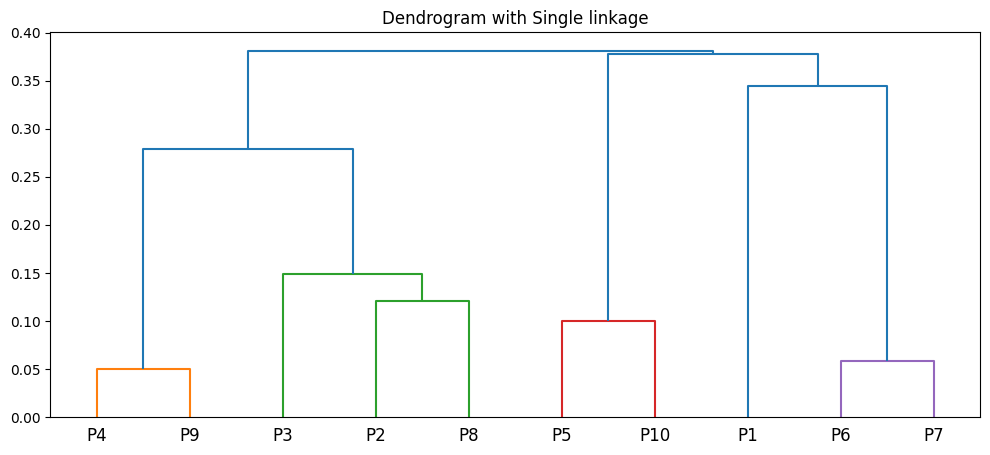

In [28]:
plt.figure(figsize=(12,5)) 
plt.title("Dendrogram with Single linkage")  
dend = shc.dendrogram(shc.linkage(data[['a', 'b']], method='single'), labels=data.index)

In [ ]:
perform complete link clustering method, the longest distance between 2 clusters is considered when one or both the clusters have 2 or more points

In [27]:
def complete_linkage(dist_matrix):
    n = len(dist_matrix)
    while n > 1:
        min_val = float('inf')
        min_index = None
        for i in range(n):
            for j in range(i+1, n):
                if dist_matrix.iloc[i, j] < min_val and dist_matrix.index[i] != dist_matrix.columns[j]:
                    min_val = dist_matrix.iloc[i, j]
                    min_index = (i, j)
        
        if min_val == float('inf'):
            break
        
        i, j = min_index
        cluster1, cluster2 = dist_matrix.index[i], dist_matrix.columns[j]
        
        print(f'Merging clusters {cluster1} and {cluster2} with distance {min_val}')
        new_cluster = f'({cluster1},{cluster2})'
        dist_matrix[new_cluster] = dist_matrix[[cluster1, cluster2]].max(axis=1)
        dist_matrix.loc[new_cluster] = dist_matrix.loc[[cluster1, cluster2]].max(axis=0)
        dist_matrix = dist_matrix.drop([cluster1, cluster2], axis=0)
        dist_matrix = dist_matrix.drop([cluster1, cluster2], axis=1)
        
        n -= 1
        
        print(dist_matrix)
        print("")

# Perform complete linkage clustering
print("Complete Linkage Clustering:")
complete_linkage(dist.copy())


Complete Linkage Clustering:
Merging clusters P4 and P9 with distance 0.05
               P1        P2        P3        P5        P6        P7        P8  \
P1       0.000000  0.788923  0.614003  0.420119  0.344819  0.396611  0.760592   
P2       0.788923  0.000000  0.192354  0.485489  0.866083  0.862844  0.120416   
P3       0.614003  0.192354  0.000000  0.386394  0.742496  0.750267  0.148661   
P5       0.420119  0.485489  0.386394  0.000000  0.382884  0.377359  0.518652   
P6       0.344819  0.866083  0.742496  0.382884  0.000000  0.058310  0.885889   
P7       0.396611  0.862844  0.750267  0.377359  0.058310  0.000000  0.890505   
P8       0.760592  0.120416  0.148661  0.518652  0.885889  0.890505  0.000000   
P10      0.520096  0.440114  0.381182  0.100000  0.454533  0.438634  0.494975   
(P4,P9)  0.491935  0.500100  0.312570  0.492443  0.741687  0.770000  0.415933   

              P10   (P4,P9)  
P1       0.520096  0.491935  
P2       0.440114  0.500100  
P3       0.381182  0.312

Dendogram for complete link clustering

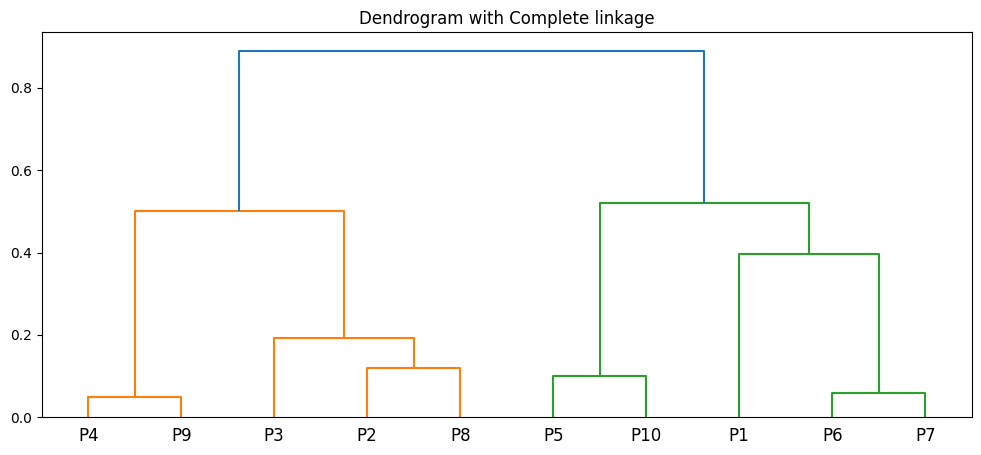

In [30]:
plt.figure(figsize=(12,5)) 
plt.title("Dendrogram with Complete linkage")  
dend = shc.dendrogram(shc.linkage(data[['a', 'b']], method='complete'), labels=data.index)